<a href="https://www.kaggle.com/code/utkarshtomar736/01-mushroom-classification?scriptVersionId=193449509" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
from fastai.vision.all import *

In [2]:
path = Path('/kaggle/input/mushrooms-images-classification-215/data/data')

In [3]:
path

Path('/kaggle/input/mushrooms-images-classification-215/data/data')

In [4]:
(path/'elfin_saddle').ls()

(#15) [Path('/kaggle/input/mushrooms-images-classification-215/data/data/elfin_saddle/11.png'),Path('/kaggle/input/mushrooms-images-classification-215/data/data/elfin_saddle/4.png'),Path('/kaggle/input/mushrooms-images-classification-215/data/data/elfin_saddle/9.png'),Path('/kaggle/input/mushrooms-images-classification-215/data/data/elfin_saddle/14.png'),Path('/kaggle/input/mushrooms-images-classification-215/data/data/elfin_saddle/1.png'),Path('/kaggle/input/mushrooms-images-classification-215/data/data/elfin_saddle/2.png'),Path('/kaggle/input/mushrooms-images-classification-215/data/data/elfin_saddle/10.png'),Path('/kaggle/input/mushrooms-images-classification-215/data/data/elfin_saddle/12.png'),Path('/kaggle/input/mushrooms-images-classification-215/data/data/elfin_saddle/7.png'),Path('/kaggle/input/mushrooms-images-classification-215/data/data/elfin_saddle/5.png')...]

In [5]:
im = Image.open((path/'elfin_saddle').ls()[0])

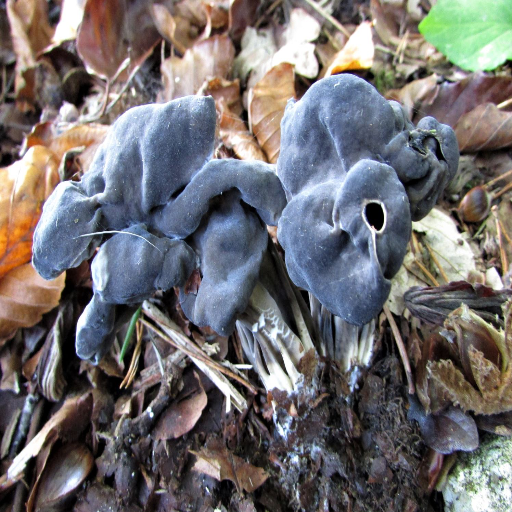

In [6]:
im

In [7]:
def get_label(path):
    return [str(path.parent.name)]

In [8]:
dblock = DataBlock(blocks = (ImageBlock(), MultiCategoryBlock()),
                  get_items = get_image_files,
                  get_y = get_label,
                  item_tfms = Resize(460),
                  batch_tfms = [*aug_transforms(size=224, min_scale=0.75),
                                Normalize.from_stats(mean=[0.3473, 0.3364, 0.2854],
                                                     std=[0.2610, 0.2427, 0.2387])])

In [9]:
dls = dblock.dataloaders(path)

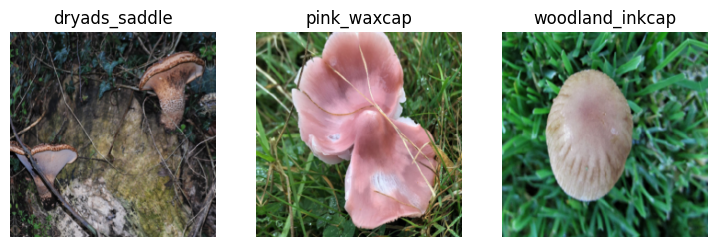

In [10]:
dls.show_batch(nrows=1, ncols=3)

In [17]:
learn = vision_learner(dls, resnet34, metrics=accuracy_multi)
# learn.fine_tune(2)

In [18]:
%%capture
learn.to_fp16()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
learn.model.to(device)

SuggestedLRs(valley=0.004365158267319202)

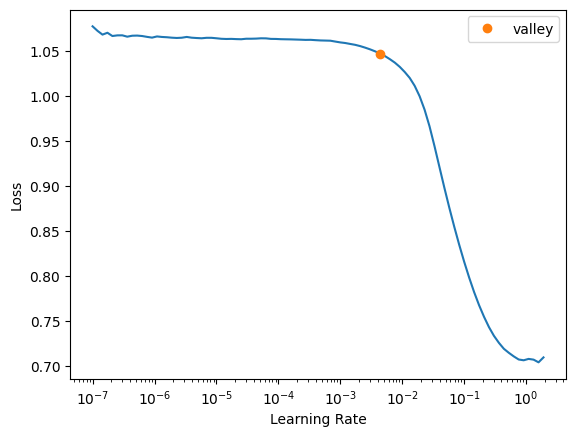

In [19]:
learn.lr_find()

In [20]:
learn.fit_one_cycle(10, 4.3e-3)

In [21]:
learn.predict((path/'blue_roundhead').ls()[0])

((#0) [],
 tensor([False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False